# Possible Analyses

In [1]:
# This will ensure that the correct version of the h5py package is installed
try:
    import h5py
    if h5py.__version__ == '2.10.0':
         print('h5py version ' + h5py.__version__ + ' already installed')
    else:
        print('h5py installed with an older version. some features may not work.')
except ImportError as e:
    !pip install h5py == '2.10.0'

h5py version 2.10.0 already installed


In [2]:
# Import necessary packages
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from pynwb import NWBHDF5IO
# read the file 
io = NWBHDF5IO('000006/sub-anm369962/sub-anm369962_ses-20170310.nwb', 'r')
nwb_file = io.read()
print(type(nwb_file))

<class 'pynwb.file.NWBFile'>


Now that we are familiar with the structure of an `NWBFile` as well as the groups encapsulated within it, we are ready to work with the data. 

The first group that we will look at is `units` becasue it contains information on our neural spikes. Let familiarize ourselves with our dataframe once again. This time we will subselect our dataframe to only contain neurons with `fair` quality. 

In [3]:
units = nwb_file.units
units_df = units.to_dataframe()
units_df = units_df[units_df['quality']=='Fair']
units_df.head()

,depth,quality,cell_type,spike_times,electrodes
id,,,,,
2,665.0,Fair,unidentified,"[329.95417899999956, 330.01945899999953, 330.0...",x y z imp \ id ...
5,715.0,Fair,unidentified,"[331.09961899999956, 332.14505899999955, 333.3...",x y z imp \ id ...
6,715.0,Fair,unidentified,"[329.91129899999953, 329.92869899999954, 330.0...",x y z imp \ id ...
7,765.0,Fair,unidentified,"[330.26357899999954, 330.3849389999996, 330.60...",x y z imp \ id ...
10,815.0,Fair,unidentified,"[329.8969389999996, 329.94389899999953, 329.95...",x y z imp \ id ...


The `spike_times` column the times at which the recorded neuron fired. Each neuron has a list of spike times for their `spike_times` column. 

In [4]:
# return the first 10 spike times for neurons 2-8
neural_data = units_df['spike_times'][1:6][:10]
neural_data

id
5     [331.09961899999956, 332.14505899999955, 333.3...
6     [329.91129899999953, 329.92869899999954, 330.0...
7     [330.26357899999954, 330.3849389999996, 330.60...
10    [329.8969389999996, 329.94389899999953, 329.95...
11    [330.08321899999953, 331.0170989999996, 331.19...
Name: spike_times, dtype: object

A spike raster plot can be created using the funtion `plt.eventplot`. A spike raster plot displays the spiking of neurons overtime. In a spike raster plot, the y-axis corresponds to the neuron being recorded and the x-axis represents the time. Each horizontal line in the plot represents the spiking of a neuron. Spike raster plots are useful as they reveal firing rate correlations between groups of neurons. For more inormation on `plt.eventplot` please visit the <a href = 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.eventplot.html'> matplotlib documentation</a>. 

We have created a function called `rasterPlot()` that creates a spike raster plot from the `spike_times` column in `units`. `rasterPlot()` takes in the arguments units_df, neuron_start, neuron_end, start_time, and end_time. Below are decriptions of each argument. 

- `unit_df`: dataframe containing spike time data
- `neuron_start`: index of first neruon of interest 
- `neuron_end`: index of last neuron of interest
- `start_time`: start time for desired time interval 
- `end_time`: end time for desired time interval

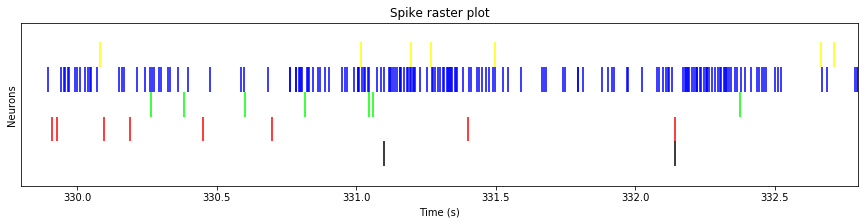

In [5]:
from matplotlib.widgets import Slider

# Set different colors for each neuron 
color_codes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1],
                        [1, 1, 0]])

# Function for creating raster plots for Units group in NWB file 
def rasterPlot(units_df,neuron_start,neuron_end,start_time,end_time):
    
    # Set figure size
    fig, ax = plt.subplots(figsize=(15,3))
    
    # Select your data 
    neural_data = units_df['spike_times'][neuron_start:neuron_end]
    
    # Plot our raster plot 
    plt.eventplot(neural_data, color = color_codes)

    # Set our axis limits to only include points in our data
    plt.xlim([start_time,end_time])
    
    # Label our firgure 
    plt.title('Spike raster plot')
    plt.ylabel('Neurons')
    plt.xlabel('Time (s)')
    plt.yticks([])


rasterPlot(units_df, neuron_start = 1, neuron_end = 6, start_time = 329.8, end_time = 332.8)

# Show our plot 
plt.show()

The plot above is only contains neural spikes from a 3 second time interval. While there are many spikes to consider in this one graph, each neuron has much more than 3 seconds worth of spike recordings. If we do not set an axis limit on the raster plot, all of our spike recordings will be displayed at once and the figure would be unreadable. Instead we can create a scollable figure that allows you to plot the entire raster plot and scroll through the x-axis in pre-determined time intervals. Below you will find the coded needed to create this type of plot. 

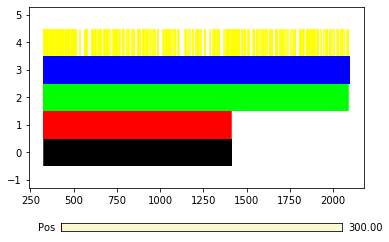

In [6]:
# Import module needed for scrollable axes 
from matplotlib.widgets import Slider

# Set up figure
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Set colors for each neuron 
color_codes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1],
                        [1, 1, 0]])

# Plot raster plot with full axes 
plt.eventplot(neural_data, color = color_codes)

# Set scroll bar dimensions and color 
axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)

# Create axis limits for scroll 
spos = Slider(axpos, 'Pos', 300.0, 2250.0)

# Determine time interval used for scroll bar 
def update(val):
    pos = spos.val
    # pos = starting position 
    # pos + 3 = figure will move by 3 values per scroll
    # 5, 0 = y-axis limits, 
    # Be sure to input a y-axis limit that will show all desired neurons
    ax.axis([pos,pos+3, -1, 6]) 
    fig.canvas.draw_idle()

spos.on_changed(update)

plt.show()

## Additional Resources 